### 分析员工流失。了解员工离开公司的原因，并了解谁将离开公司。
在过去，大多数人都关注“比率”，如损耗率和保留率。人力资源经理计算以前的比率，尝试使用数据仓库工具来预测未来的比率。这些比率表明了客户流失的总体影响，但这只是一半。除了聚合之外，另一种方法可以是关注个人记录。

有很多关于客户流失的案例研究。在客户流失中，您可以预测哪个客户何时停止购买。员工流失与客户流失相似，它主要关注员工而不是客户。在这里，您可以预测哪个员工何时终止服务。员工流失是昂贵的，并且渐进式改进将产生显着的结果。它将帮助我们设计更好的留存计划并提高员工满意度。

## 员工流失分析
员工流失可以定义为知识资产从公司或组织流出或离开。或者，简单来说，当员工离开组织时称为流失。另一个定义可以是当一个群体成员离开群体时，称为流失。

在研究中，发现员工流失将受到年龄，任期，工资，工作满意度，工资，工作条件，增长潜力和员工对公平的感知的影响。其他一些变量，如性别，种族，教育程度和婚姻状况，也是预测员工流失的重要因素。在某些情况下，例如具有独特技能的员工更难以被代替，它影响现有员工的进行中的工作和生产力。获得新员工作为替代会产生诸如招聘成本和培训成本等成本。此外，新员工将花时间学习技术或业务专业知识技能达到与老员工相似的的水平。一些机构通过应用机器学习技术来预测员工流失解决这个问题。

以下几点可以帮助您更好地理解员工和客户流失：
+ 企业可以选择雇用某人，而在营销中，您无法选择您的客户。
+ 员工将成为您公司的门面，而且员工共同生产您公司所做的一切。
+ 失去客户会影响收入和品牌形象。与保留现有客户相比，获取新客户既困难又昂贵。员工流失对于一个组织公司来说也是痛苦的。寻找和培训替代品需要时间和精力。

与客户流失相比，员工流失具有独特的动态特性。它有助于我们设计更好的员工保留计划并提高员工满意度。数据科学算法可以预测未来的流失。

## 1.探索性分析

In [1]:
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
% matplotlib inline

In [2]:
data=pandas.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


可以看到这份数据还是十分完整的，没有缺失值，可以省去一部分数据清洗的过程。此数据集包含14999个样本和10个字段。这10个字段的含义是：、
+ satisfaction_level：员工满意度，范围0-1
+ last_evaluation：由雇主评估的绩效，其范围也为0-1。
+ number_projects：分配给员工的项目数
+ average_monthly_hours：一个月内员工平均工作小时数
+ time_spent_company：表示员工体验。员工在公司中度过的年数。
+ work_accident：员工是否发生过工伤事故。
+ promotion_last_5years：员工是否在过去5年内获得晋升。
+ Departments：员工的工作部门。
+ salary：员工的薪酬水平，如low,medium,high。
+ left：员工是否离开公司

在数据集中，员工可以根据是去还是留分为两类，我们可以看一下这两组的平均值

In [4]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


这里我们可以进行初步解释，离开的员工平均满意度更低，工作时间更长，工伤率更高，晋升率低。因为工资是字符串所以没有被取均值。这些原因也是符合我们直觉的。

In [5]:
# 我们看下去留的各有多少人
data.left.value_counts()
# 一共15000人，走了3571人，占23%

0    11428
1     3571
Name: left, dtype: int64

## 2.数据可视化

我们来可视化一下这些属性取值的分布，有助于我们快速了解这些员工的结构

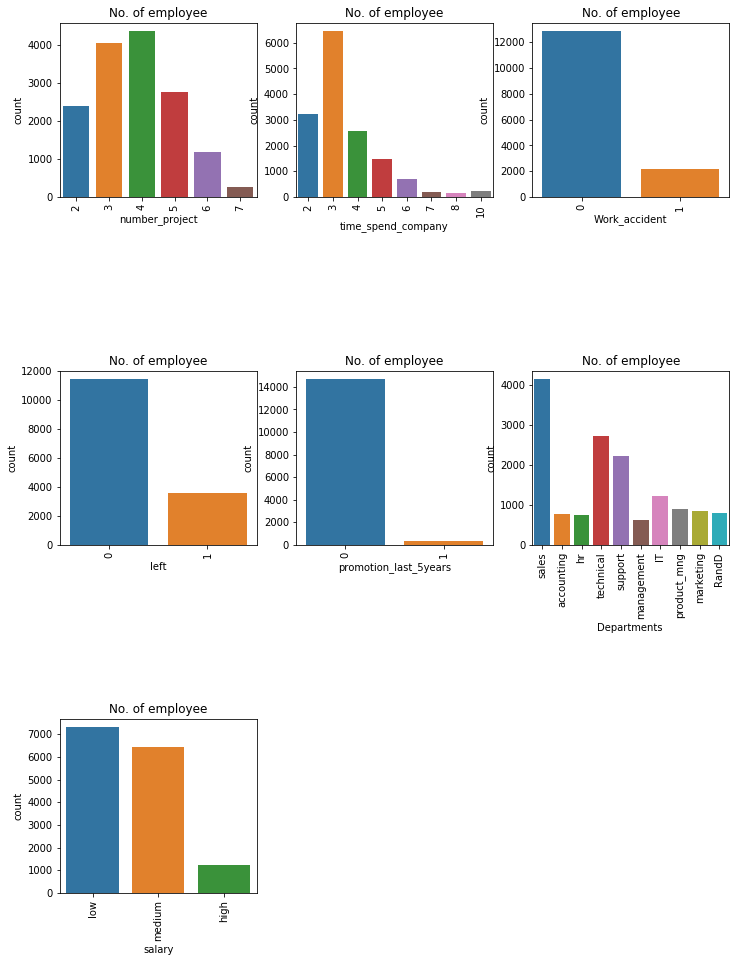

In [6]:
features=['number_project','time_spend_company',
          'Work_accident','left', 'promotion_last_5years',
          'Departments ','salary']
fig=plt.subplots(figsize=(12,16))
for i, j in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

可以从中得到以下信息：
+ 大多数员工做了3-5个项目
+ 从3年到4年经验的员工数有很大的下降，意味着做了三年后有很大概率离开，是道坎啊
+ 员工离职人数占总就业人数的23％。
+ 在过去的5年中，员工得到晋升的数量非常的少
+ 销售部门拥有最多的员工，其次是技术和支持
+ 大多数员工的工资中等或低。

现在如果把去留的员工分开画，看看在分布上有什么不同

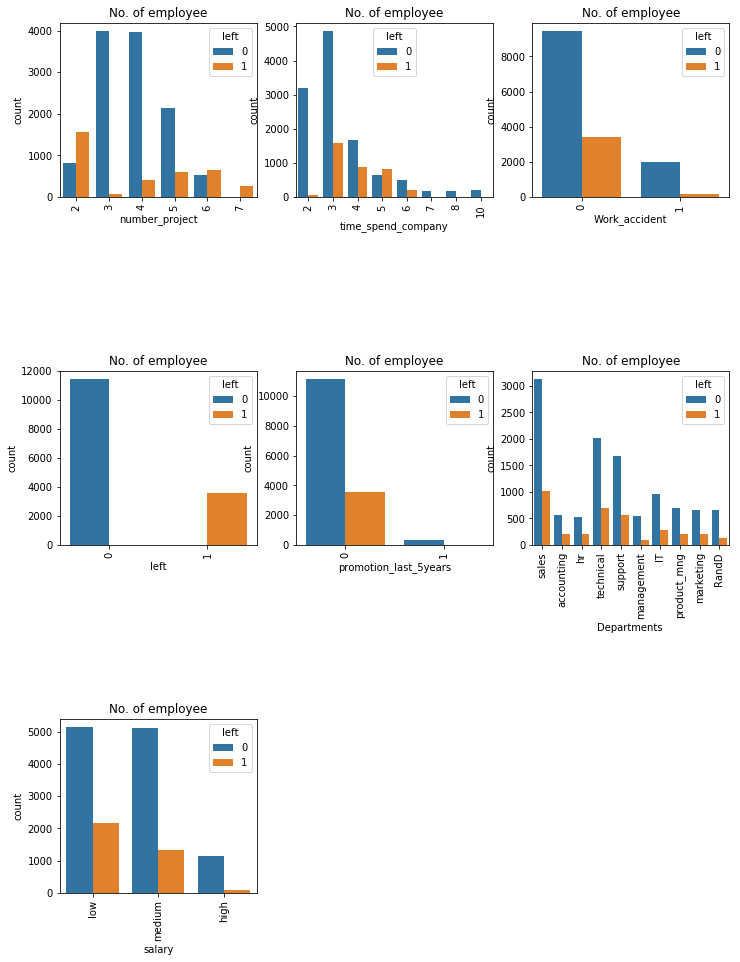

In [7]:
fig=plt.subplots(figsize=(12,16))
for i, j in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

可以从这个可视化中观察到以下几点：
+ 那些项目数少于3或超过5的员工离开的超过留下的，项目数7个的全部离开了，似乎是负担过重了
+ 具有5年经验的员工离开的更多可能因为过去5年没有晋升，有超过6年经验的员工可能因为对公司的感情而没有离开
+ 离开的人都是在过去5年内没有获得晋升的人

### 数据可视化结果摘要：
以下是影响一个人是否离开公司的最大因素：
+ 晋升：如果员工在过去5年内没有获得晋升，他们就更有可能辞职。
+ 与公司共度时光：在这里，三年标志看起来像是员工职业生涯的关键点。他们中的大多数人在三年后辞去了工作。另一个重要时间点是6年，之后员工就不太可能离开。
+ 项目数量：员工工作参与度是影响员工离开公司的另一个关键因素。拥有3-5个项目的员工离开公司的可能性较小。项目数量过少或者过多的员工可能会离开。
+ 薪酬：大部分退出员工处在中低薪阶层。


## 3.聚类分析
正所谓幸福是相似的，不幸各有各的不幸。离开的原因有很多，我们想看看离职的人群中有哪些共同点，能否用聚类分成几类人。注意到之前可视化的是些离散变量或者分类变量，还有两个连续变量满意度和绩效没有看，我们先看看它们的分布。

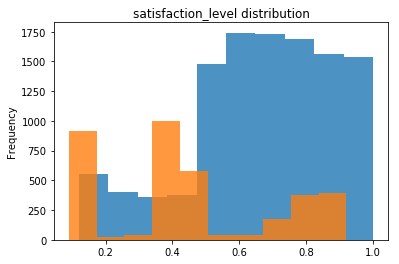

In [8]:
data[data['left']==0].satisfaction_level.plot(kind='hist',alpha=0.8);
data[data['left']==1].satisfaction_level.plot(kind='hist',alpha=0.8);
plt.title('satisfaction_level distribution');

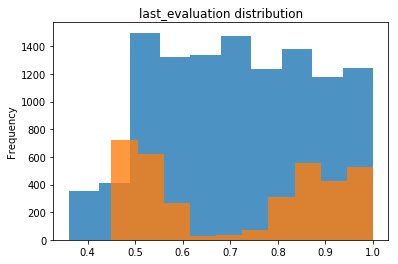

In [9]:
data[data['left']==0].last_evaluation.plot(kind='hist',alpha=0.8);
data[data['left']==1].last_evaluation.plot(kind='hist',alpha=0.8);
plt.title('last_evaluation distribution');

我们可以看到，离开员工的留下员工的满意度和绩效分布有明显不同。未离职员工的分布都是一种平台式的分布，满意度和绩效都偏高。离职的员工的满意度明显分为低中高三个峰，绩效明显分为两个峰。因此，对于一个员工离开或者留下最重要的因素可能就是就是他的满意度和业绩。我们可以用这两个因素来做一个k-均值聚类分析。

In [10]:
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[data.left == 1][['satisfaction_level', 'last_evaluation']]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

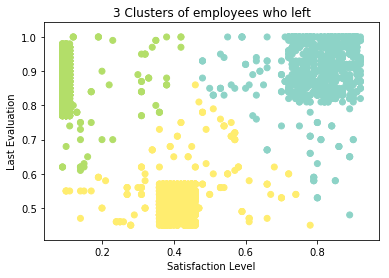

In [18]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'],
            left_emp['last_evaluation'], 
            c=left_emp['label'],cmap='Set3')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left');

这里可以很明显的看出，离职的员工可以分为三类：
+ 高满意度和高绩效评价（图中右上角冰绿色显示），也可以称之为“胜利者”，可能是被挖走的
+ 低满意度和高绩效评价（图中左上角草绿色显示），也可以称之为“沮丧者”，可能是做得多得的少
+ 中等满意度适度绩效评价（中间黄色显示），也可以称之为“不匹配”

## 4.建立预测模型
### 数据预处理
许多机器学习算法需要数值输入数据，因此需要用数值列表示分类列。
为了对此数据进行编码，您可以将每个值映射到一个数字。例如，Salary列的值可以表示为low：0，medium：1和high：2。
此过程称为标签编码，sklearn可以方便地使用LabelEncoder完成此操作。

In [19]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['Departments ']=le.fit_transform(data['Departments '])

### 拆分训练集和测试集
要了解模型性能，将数据集划分为训练集和测试集是一种很好的策略。
让我们使用函数train_test_split（）拆分数据集。需要传递3个参数，特征，目标和测试集大小。此外，可以使用random_state随机选择记录。在这里，数据集分为两部分，比例为7:3。这意味着70％的数据将用于模型训练，30％用于模型测试。

In [23]:
#Spliting data into Feature and Target
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=data['left']
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42)  
# 70% training and 30% test

### 模型建立
在这里，您将使用Gradient Boosting Classifier（梯度增强分类器）预测流失。

首先，导入GradientBoostingClassifier模块并使用GradientBoostingClassifier()函数创建Gradient Boosting分类器对象。

然后，使用fit()在训练集上拟合模型，并使用predict()对测试集执行预测。

In [24]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

### 评价模型性能

In [26]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806


那么，得到分类正确率为97％，可以认为是良好的准确性。
精度95%意味着当模型预测员工要离开时，95%的情况员工确实会离开。
召回率也就是真阳性率92%意味着离职的员工中92%会被模型识别出来。

## 5.结论与建议
+ 从3年到4年经验的员工数有很大的下降，意味着做了三年后有很大概率离开；超过6年因为感情深了稳定了，也基本不会离开。因此3年和6年是两道坎，在第3年要对可能离开的投入更大的关注。
+ 项目数3-5是比较合适的项目数，过高或者过低员工离开的比例会变大。
+ 如果在5年内获得晋升，员工离开的概率会小很多.
+ 定期通过模型筛选出可能离职的员工，给予重点关注。